# Mental Health Assessment Classification Using Neural Network

### IMPORTNG LIBRARIES

In [54]:
import tensorflow as tf
from tensorflow.keras import models, layers
from tensorflow.keras.utils import image_dataset_from_directory
import matplotlib.pyplot as plt
import numpy
import os

### CONVERTING IMAGES TO TENSORS

In [87]:
'''
Use the image_dataset_from_directory function to load the dataset.
The subset parameter is set to 'training' to get the training dataset.
The validation_split parameter is set to 0.2 to split 20% of the data for validation
'''

train_ds = image_dataset_from_directory(
     r"C:\Users\Satoshi\OneDrive\Desktop\mini-projects\Images\archive\EmotionsDataset_Splitted\data\train",
     shuffle =True,
     subset = "training",
     image_size = (224,224),
     seed = 123, 
     batch_size =20,
     validation_split=0.2,
     follow_links=True) 

valid_ds = image_dataset_from_directory(
     r"C:\Users\Satoshi\OneDrive\Desktop\mini-projects\Images\archive\EmotionsDataset_Splitted\data\train",
     shuffle =True,
     seed = 123,
     validation_split = 0.2,
     subset = 'validation',
     image_size = (224,224),
     batch_size = 20)

test_ds = image_dataset_from_directory(
     r"C:\Users\Satoshi\OneDrive\Desktop\mini-projects\Images\archive\EmotionsDataset_Splitted\data\test",
     shuffle =True,
     seed = 123,
     image_size = (400,400),
     batch_size = 20)


Found 3152 files belonging to 4 classes.
Using 2522 files for training.
Found 3152 files belonging to 4 classes.
Using 630 files for validation.
Found 788 files belonging to 4 classes.


In [88]:
class_names = train_ds.class_names
class_names    # for printing class names

['angry', 'happy', 'nothing', 'sad']

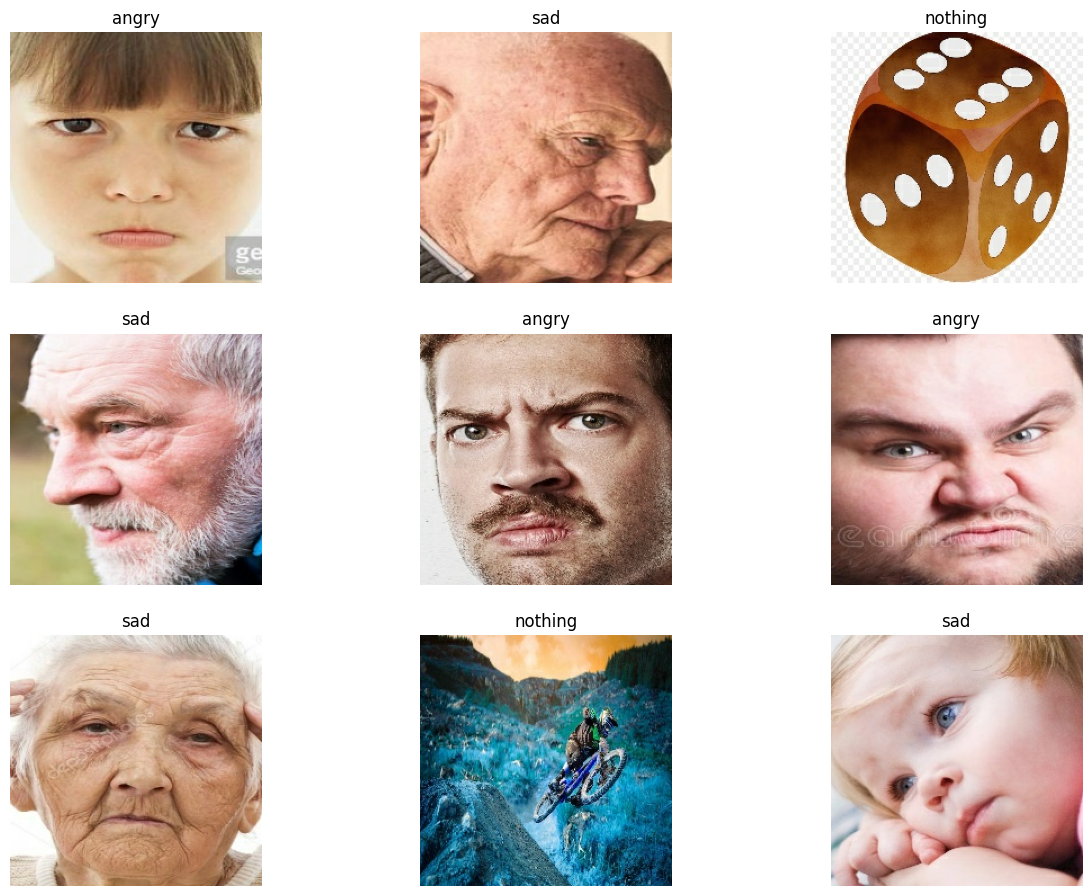

In [89]:
plt.figure(figsize=(15,15))
for image_batch,label_batch in train_ds.take(5):
    for i in range(9):
        plt.subplot(4,3,i+1)
        plt.imshow(image_batch[i].numpy().astype('uint8'))
        plt.title(class_names[label_batch[i]])
        plt.axis('off')

In [90]:
# Looking the number of data-pointpresent in each set (data_point* batch_size = number of images)
print("number of batches in Training dataset are : ",len(train_ds))
print("number of batches in Testing dataset are : ",len(test_ds))
print("number of batches in Validation dataset are : ",len(valid_ds))

number of batches in Training dataset are :  127
number of batches in Testing dataset are :  40
number of batches in Validation dataset are :  32


In [91]:
for image_batch,label_batch in train_ds.take(1):
    print(image_batch.shape)
    print(label_batch.numpy())  # here 3,9,3,7 ......  are class labels 

(20, 224, 224, 3)
[2 3 3 3 3 1 2 3 0 2 2 2 1 3 2 1 2 2 0 1]


### Pre-Processing

In [92]:
"""
cache(): This line stores the training dataset. Caching keeps the dataset in memory, which helps speed up subsequent loops over it.

shuffle(1000): This line shuffles the training data. Shuffling randomly orders the dataset, which can assist enhance model performance by lowering the danger of overfitting to a certain sequence of data.

Prefetch() improves model performance by lowering the time spent waiting for data to be loaded. The prefetch method accepts one argument, buffer_size, which determines the number of items to prefetch. In this scenario, the buffer size is specified as tf.data.AUTOTUNE, which calculates the ideal buffer size depending on the system's resources.

"""
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
val_ds = valid_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)

In [93]:
"""Adding Layers for Standardizing Image Pixel Values and Resizing the images to desired range"""
from tensorflow.keras.layers import Resizing, Rescaling ,RandomFlip, RandomRotation

resize_and_rescale = tf.keras.Sequential([
    Resizing(224, 224),
    Rescaling(1.0 / 255)
])
 # Standardizing size and scale of pixels 

#### DATA AUGMENTATION

In [94]:
"""Adding layers for Generating different views of Object so that if anyone capture image at different angle or side it should be able to predict"""
from tensorflow.keras.layers import RandomFlip, RandomRotation
data_augmentation = tf.keras.Sequential([
    RandomFlip("horizontal"),
    RandomFlip("vertical"),
    RandomRotation(0.2)
]) # Generating different views of same leaf so that if anyone capture image at different angle or side it should be able to predict

### MODELLING USING CONVOLUTIONAL NEURAL NETWORK

In [95]:
input_shape = (20,224,224,3) # (Batches , X, Y, Channel)  -->> Channel = 3 -> RGB 
n_classes = 8
model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32,(3,3),activation="relu",input_shape = input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(32,kernel_size = (3,3),activation="relu"),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size = (3,3),activation="relu"),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size = (3,3),activation = "relu"),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(32,kernel_size = (3,3),activation = "relu"),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64,activation = "relu"),
    layers.Dense(n_classes,activation = "softmax")
])

model.build(input_shape = input_shape)

In [96]:
model.summary()  # summary of neural network architecture 

Model: "sequential_22"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential_20 (Sequential)           │ (20, 224, 224, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential_21 (Sequential)           │ (20, 224, 224, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_70 (Conv2D)                   │ (20, 222, 222, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_70 (MaxPooling2D)      │ (20, 111, 111, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_71 (Conv2D)                   │ (20, 109, 109, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_71 (MaxPooling2D)      │ (20, 54, 54, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_72 (Conv2D)                   │ (20, 52, 52, 64)            │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_72 (MaxPooling2D)      │ (20, 26, 26, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_73 (Conv2D)                   │ (20, 24, 24, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_73 (MaxPooling2D)      │ (20, 12, 12, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_74 (Conv2D)                   │ (20, 10, 10, 32)            │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_74 (MaxPooling2D)      │ (20, 5, 5, 32)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_14 (Flatten)                 │ (20, 800)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_39 (Dense)                     │ (20, 64)                    │          51,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_40 (Dense)                     │ (20, 8)                     │             520 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 135,816 (530.53 KB)

 Trainable params: 135,816 (530.53 KB)

 Non-trainable params: 0 (0.00 B)

In [97]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = False),
    metrics = ['accuracy']
)
## keras.losses.SparseCategoricalCrossentropy

In [98]:
history = model.fit(
    train_ds,
    epochs = 30,
    batch_size = 20,
    verbose = 1,
    validation_data = valid_ds
)

Epoch 1/30
127/127 ━━━━━━━━━━━━━━━━━━━━ 38s 281ms/step - accuracy: 0.4409 - loss: 1.2440 - val_accuracy: 0.5317 - val_loss: 0.9485
Epoch 2/30
127/127 ━━━━━━━━━━━━━━━━━━━━ 33s 259ms/step - accuracy: 0.5384 - loss: 0.9049 - val_accuracy: 0.5524 - val_loss: 0.8938
Epoch 3/30
127/127 ━━━━━━━━━━━━━━━━━━━━ 35s 277ms/step - accuracy: 0.5544 - loss: 0.8614 - val_accuracy: 0.5365 - val_loss: 0.8717
Epoch 4/30
127/127 ━━━━━━━━━━━━━━━━━━━━ 36s 281ms/step - accuracy: 0.5360 - loss: 0.8629 - val_accuracy: 0.5413 - val_loss: 0.8542
Epoch 5/30
127/127 ━━━━━━━━━━━━━━━━━━━━ 41s 321ms/step - accuracy: 0.5301 - loss: 0.8816 - val_accuracy: 0.5778 - val_loss: 0.8723
Epoch 6/30
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 307ms/step - accuracy: 0.5862 - loss: 0.8136 - val_accuracy: 0.5540 - val_loss: 0.9082
Epoch 7/30
127/127 ━━━━━━━━━━━━━━━━━━━━ 31s 245ms/step - accuracy: 0.5723 - loss: 0.8262 - val_accuracy: 0.5778 - val_loss: 0.8930
Epoch 8/30
127/127 ━━━━━━━━━━━━━━━━━━━━ 41s 320ms/step - accuracy: 0.5919 - loss: 0

In [101]:
model.fit(train_ds,batch_size = 20 , verbose=1 , validation_data = valid_ds , initial_epoch = 30, epochs = 50)

Epoch 31/50
127/127 ━━━━━━━━━━━━━━━━━━━━ 55s 433ms/step - accuracy: 0.7051 - loss: 0.6543 - val_accuracy: 0.6968 - val_loss: 0.7202
Epoch 32/50
127/127 ━━━━━━━━━━━━━━━━━━━━ 54s 425ms/step - accuracy: 0.7005 - loss: 0.6464 - val_accuracy: 0.6794 - val_loss: 0.7290
Epoch 33/50
127/127 ━━━━━━━━━━━━━━━━━━━━ 54s 427ms/step - accuracy: 0.6985 - loss: 0.6530 - val_accuracy: 0.6921 - val_loss: 0.7267
Epoch 34/50
127/127 ━━━━━━━━━━━━━━━━━━━━ 54s 425ms/step - accuracy: 0.7058 - loss: 0.6331 - val_accuracy: 0.6730 - val_loss: 0.7155
Epoch 35/50
127/127 ━━━━━━━━━━━━━━━━━━━━ 54s 429ms/step - accuracy: 0.7137 - loss: 0.6337 - val_accuracy: 0.6524 - val_loss: 0.7951
Epoch 36/50
127/127 ━━━━━━━━━━━━━━━━━━━━ 54s 426ms/step - accuracy: 0.7089 - loss: 0.6494 - val_accuracy: 0.6730 - val_loss: 0.7476
Epoch 37/50
127/127 ━━━━━━━━━━━━━━━━━━━━ 54s 425ms/step - accuracy: 0.7338 - loss: 0.6055 - val_accuracy: 0.6746 - val_loss: 0.6964
Epoch 38/50
127/127 ━━━━━━━━━━━━━━━━━━━━ 54s 423ms/step - accuracy: 0.7051 -

In [102]:
model.fit(train_ds,batch_size = 20 , verbose=1 , validation_data = valid_ds , initial_epoch = 50, epochs = 100)

Epoch 51/100
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 307ms/step - accuracy: 0.7445 - loss: 0.5756 - val_accuracy: 0.6937 - val_loss: 0.7131
Epoch 52/100
127/127 ━━━━━━━━━━━━━━━━━━━━ 35s 277ms/step - accuracy: 0.7029 - loss: 0.6163 - val_accuracy: 0.6905 - val_loss: 0.6989
Epoch 53/100
127/127 ━━━━━━━━━━━━━━━━━━━━ 35s 280ms/step - accuracy: 0.7255 - loss: 0.5865 - val_accuracy: 0.7032 - val_loss: 0.7208
Epoch 54/100
127/127 ━━━━━━━━━━━━━━━━━━━━ 35s 277ms/step - accuracy: 0.7379 - loss: 0.5767 - val_accuracy: 0.7063 - val_loss: 0.7560
Epoch 55/100
127/127 ━━━━━━━━━━━━━━━━━━━━ 35s 279ms/step - accuracy: 0.7272 - loss: 0.5894 - val_accuracy: 0.7111 - val_loss: 0.6718
Epoch 56/100
127/127 ━━━━━━━━━━━━━━━━━━━━ 35s 278ms/step - accuracy: 0.7502 - loss: 0.5440 - val_accuracy: 0.7016 - val_loss: 0.7384
Epoch 57/100
127/127 ━━━━━━━━━━━━━━━━━━━━ 35s 277ms/step - accuracy: 0.7619 - loss: 0.5425 - val_accuracy: 0.7143 - val_loss: 0.7112
Epoch 58/100
127/127 ━━━━━━━━━━━━━━━━━━━━ 36s 280ms/step - accuracy: 

In [104]:
scores = model.evaluate(test_ds)
scores

40/40 ━━━━━━━━━━━━━━━━━━━━ 6s 141ms/step - accuracy: 0.7362 - loss: 0.7030


[0.6980661153793335, 0.7411167621612549]

In [105]:
history
history.params
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [106]:
acc = history.history["accuracy"]
val_acc= history.history["val_accuracy"]

loss = history.history["loss"]
val_loss = history.history["val_loss"]

Text(0.5, 1.0, 'Training and Validation loss')

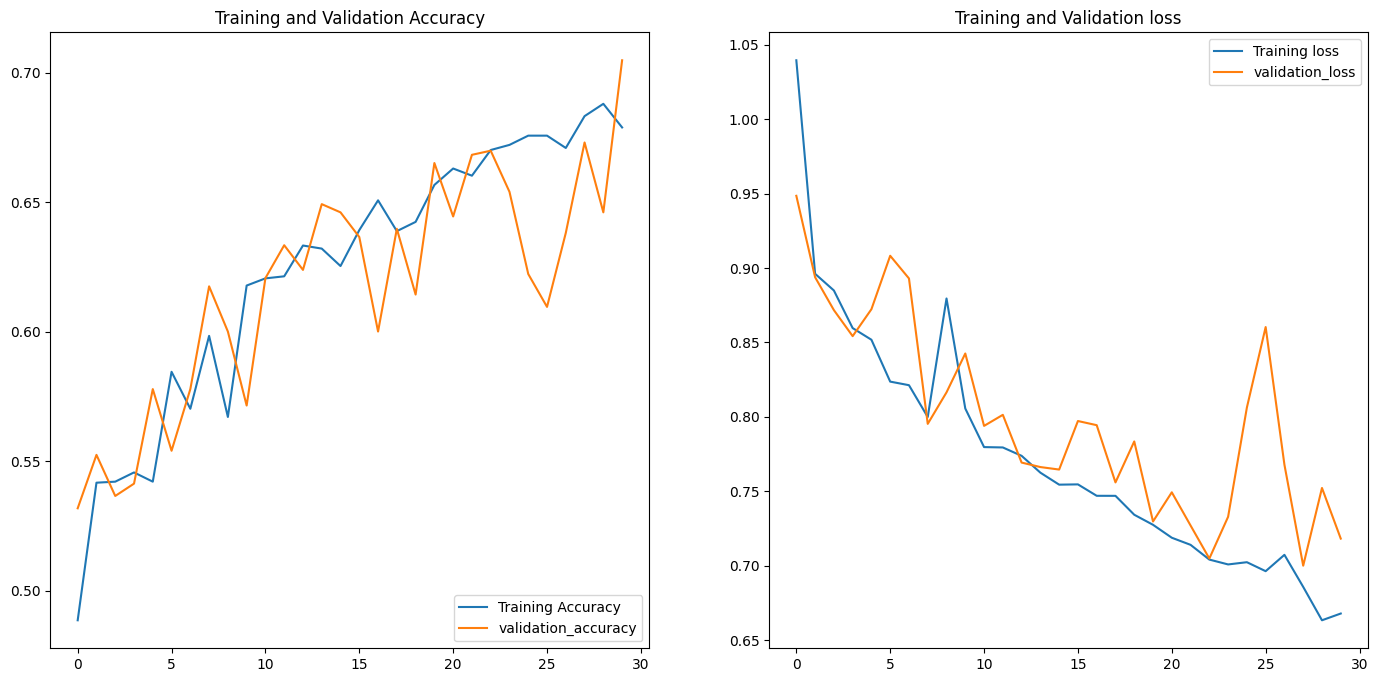

In [107]:
plt.figure(figsize=(17,8))
plt.subplot(1,2,1)
plt.plot(range(30),acc,label="Training Accuracy")
plt.plot(range(30),val_acc,label = "validation_accuracy")
plt.legend(loc="lower right")
plt.title("Training and Validation Accuracy")

plt.subplot(1,2,2)
plt.plot(range(30),loss,label="Training loss")
plt.plot(range(30),val_loss,label = "validation_loss")
plt.legend(loc="upper right")
plt.title("Training and Validation loss")

first image to predict
actual label :  happy
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step
happy


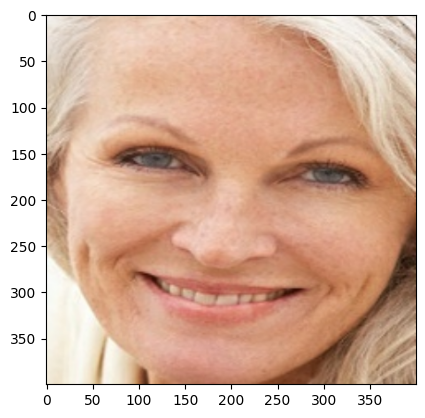

In [109]:
for image_batch,label_batch in test_ds.take(1):
    first_image = image_batch[0].numpy().astype("uint8")
    first_label = label_batch[0].numpy()
    
    print('first image to predict')
    plt.imshow(first_image)
    print('actual label : ',class_names[first_label])
    
    batch_prediction = model.predict(image_batch)
    print(class_names[numpy.argmax(batch_prediction[0])])
    

In [110]:
## Defining functions for predicting test dataset results

def predict(model,img):
    img_arry = tf.keras.preprocessing.image.img_to_array((img))
    img_array = tf.expand_dims(img_arry,0)  ## creating a batch
    # prediction
    prediction = model.predict(img_array)
    
    pred_class = class_names[numpy.argmax(prediction[0])]
    confidence = round(100*(numpy.max(prediction[0])),2)
    return pred_class , confidence
    

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 393ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


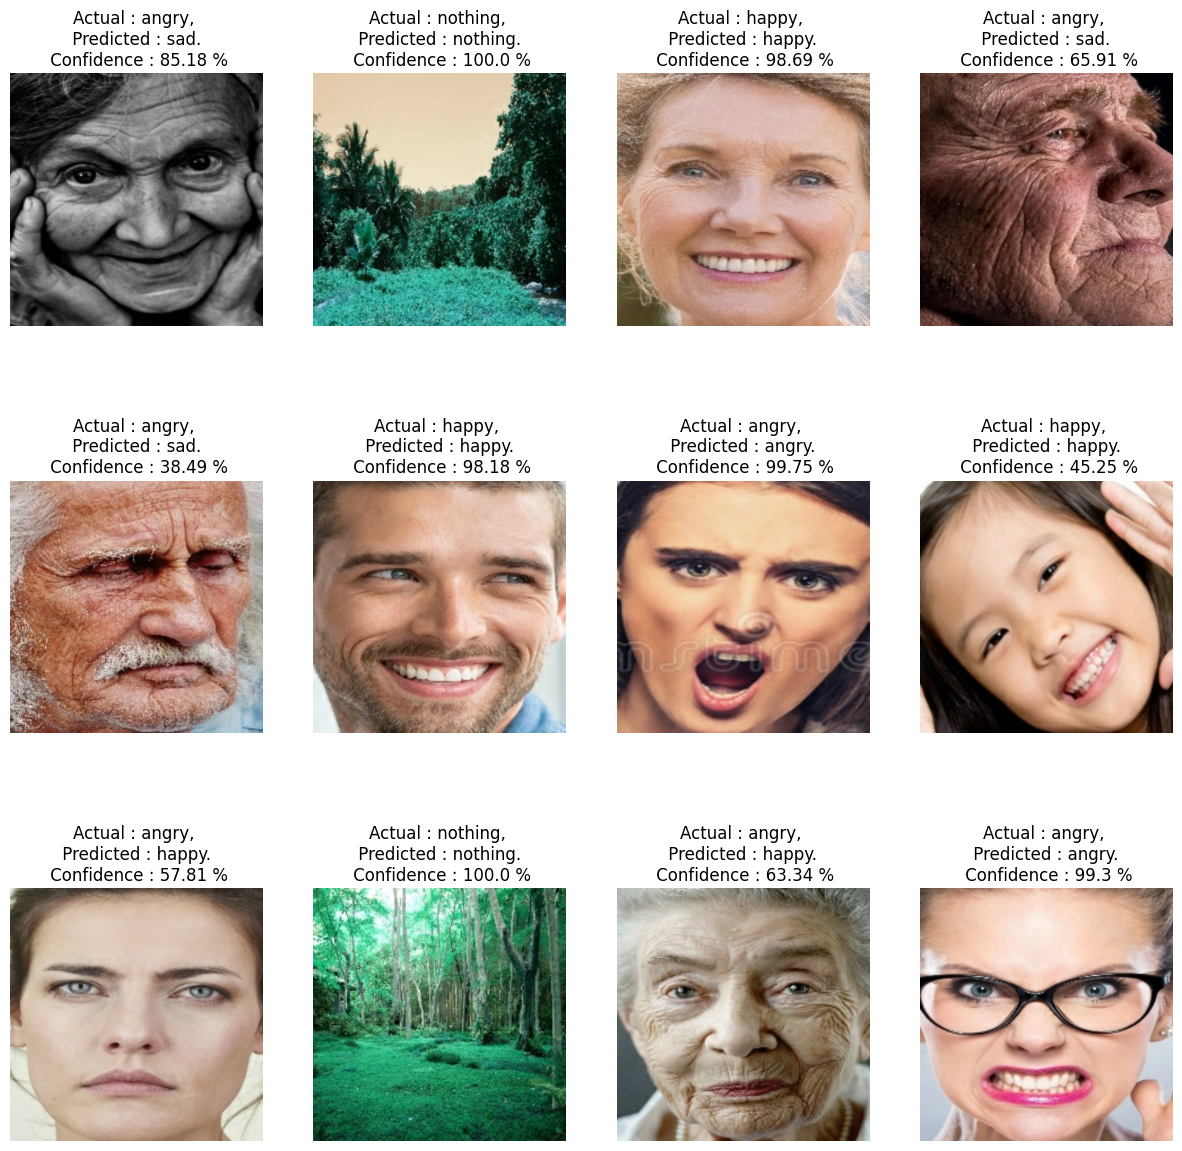

In [111]:
plt.figure(figsize = (15,15))
for images,label in test_ds.take(1):
    for i in range(12):
        ax = plt.subplot(3,4,i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        
        pred_class , confidence = predict(model,images[i])
        actual_class = class_names[label[i]]
        
        plt.title(f"Actual : {actual_class}, \n Predicted : {pred_class}. \n Confidence : {confidence} %")
        plt.axis('off')

In [113]:
# import os
# model_version = max([int(i) for i in os.listdir(r"") + [0]])+1
# model.save(f'{model_version}')